<font color= 'orange'>MonteCarlo-Simple-Exercises</font>

[![MonteCarlo-Simple-Ex](https://img.shields.io/badge/MC_Simple_Ex.-README.md-black?style=square&logo=github&logoColor=black)](https://github.com/EstebanMqz/MonteCarlo-Simple-Ex)

1. As a simple example of a **Monte Carlo** simulation, consider finding the probability of a particular sum of rolling three dices (each dice has values ​​from one to six).<br>
In addition, each dice has the following characteristics: the first dice is not loaded (uniform distribution, all are equiprobable);<br>
the second and third dice are loaded based on a binomial distribution with parameters (`n=5, p=0.5` and `n=5, p=0.2`).<br>
Find the probability that the resulting sum is 7, 14, or 18.

In [ ]:
# Package import
import numpy as np
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt

#### <span style='color:lightbrown'> 1. Ivan Arellano Ruelas </span><br> 

In [2]:
#Solution code of Ivan.
np.random.seed(44)
n = 1000000
unloaded_dice = np.random.randint(1,7,n)
loaded_dice1 = st.binom(n=5 , p=0.5 , loc=1).rvs(size=n)
loaded_dice2 = st.binom(n=5 , p=0.2 , loc=1).rvs(size=n)
sum = unloaded_dice + loaded_dice1 + loaded_dice2

result = [7,14,18]
[len(sum[sum == i])/len(sum) for i in result]
      

[0.126805, 0.013711, 4e-06]

##### <span style='color:lightblue'> 1. EstebanMqz </span><br> 

The probability of obtaining a sum of 7,14 and 18 in the throw of 3 dice is: [0.126805, 0.013711, 4e-06] for each sum respectively.


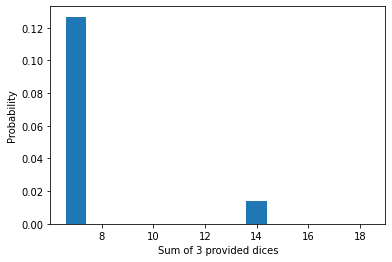

In [3]:
#Solution code of Esteban.
np.random.seed(500) #random values set

dice1 = dice1=np.random.randint(low=1, high=7, size=1000000) #Random distribution for discrete values.
dice2 = st.binom(5, 0.5, loc = 1).rvs(size = 1000000) #Binomial distribution, size = # of simulations.
dice3 = st.binom(5, 0.2, loc = 1).rvs(size = 1000000) #Same size 0f experiments.

#List Compression
x = [len(sum[sum == x])/len(sum) for x in [7,14,18]]
print('The probability of obtaining a sum of 7,14 and 18 in the throw of 3 dice is:',
        x, 'for each sum respectively.')

plt.bar([7,14,18], x)
plt.xlabel('Sum of 3 provided dices')
plt.ylabel('Probability')
plt.show()

2. **Simulation**<br>

**Premises for the simulation**:
- Food business that sells drinks and food.
- Business.
- Business in central cafe.
- Type of clients (men & women).
- Profitability of 60%.

**Aim**: <br>
Carry out a simulation estimating the average time it will take customers to be served between the hours of 6:30 a.m. and 1 p.m. <br> 
**Determine consumption** (*Analyze assumptions and limitations*).

Customer Classification:
- Female = 1 random $\longrightarrow$ < 0.5
- Male = 0 $\longrightarrow$ random $\geq$ 0.5.

Initial conditions:
- All probability distributions will be assumed to be *uniform*.
- Simulation time: 6:30 am - 1:30 pm $\longrightarrow$ T = 7 hours = 25200 sec.
- Arrival time until being attended: Min=5sec, Max=30sec.
- Time it takes customers to be served:
    - Woman: Min = 1 min = 60 sec, Max = 5 min = 300 sec
    - Man: Min = 40 sec, Max = 2 min= 120 sec
- Consumption according to the type of client:
    - Woman: Min = 30 pesos, Max = 100 pesos
    - Man: Min = 20 pesos, Max = 80 pesos

#### Answer the following questions based on the data from the problem:
1. What were the **expenses** of men and women in 5 days of work?
2. What was the **average consumption** of men and women?
3. What was the number of **people served** per day?
4. What was the average **service time**?
5. How much was the average **profit** of the cafeteria in 5 days of work and its respective profitability?

In [4]:
#Data
d = 5
T =25200
T_at_min = 5; T_at_max = 30
T_woman_min =60; T_woman_max = 300
T_man_min = 40; T_man_max = 120
C_woman_min = 30; C_woman_max = 100
C_man_min = 20; C_man_max = 80


#### <span style='color:lightbrown'> 2. Ivan Arellano Ruelas </span><br> 

In [5]:
#Simulations

sim_t_aten = np.random.uniform(T_at_min,T_at_max)
sim_t_man = np.random.uniform(T_man_min,T_man_max)
sim_t_woman = np.random.uniform(T_woman_min,T_woman_max)
sim_c_man = np.random.uniform(C_man_min,C_man_max)
sim_c_woman = np.random.uniform(C_woman_min,C_woman_max)
print('Attention time simulation:',sim_t_aten,'\n',
      'Simulation of Men time:', sim_t_man,'\n',
      'Simulation of Women time:',sim_t_woman,'\n',
      'Men consumption simulation:',sim_c_man,'\n',
      'Women consumption simulation:',sim_c_woman)

Attention time simulation: 7.039071991167438 
 Simulation of Men time: 76.24782160857893 
 Simulation of Women time: 98.15699379842069 
 Men consumption simulation: 78.37118982825598 
 Women consumption simulation: 40.15648138753554


In [6]:
hombres = sim_t_man + sim_t_aten,sim_c_man
mujeres = sim_t_woman +  sim_t_aten,sim_c_woman
hombres , mujeres

((83.28689359974636, 78.37118982825598),
 (105.19606578958812, 40.15648138753554))

In [7]:
Consumption_H = []
Consumption_M = []
counter = 0
People = []
for i in range(d):
    t_total = 0
    counter = 0
    while t_total < T:
        H_M = np.random.rand()
        if H_M >= 0.5:
            time = [np.random.uniform(T_man_min,T_man_max) + np.random.uniform(T_at_min,T_at_max) ,
            np.random.uniform(C_man_min,C_man_max)]
            h = Consumption_H.append(time[1])
        else:
            time = [np.random.uniform(T_woman_min,T_woman_max) + np.random.uniform(T_at_min,T_at_max),
            np.random.uniform(C_woman_min,C_woman_max)]
            m = Consumption_M.append(time[1])
            
        counter += 1
        t_total += time[0]
    People.append(counter)
        

In [8]:
np.array(Consumption_H).sum(), np.array(Consumption_M).sum(),np.array(Consumption_H).mean(), np.array(Consumption_H).mean(),People, (np.array(t_total)/np.array(People)).mean(),np.array(Consumption_H).sum()*.60 + np.array(Consumption_M).sum()*.60

(20942.931994734143,
 28958.570925575146,
 49.86412379698606,
 49.86412379698606,
 [177, 165, 190, 166, 159],
 147.6099161430545,
 29940.90175218557)

#### *Optimal programming*

In [9]:
def timeH():
    """
    With this function I try to speed up the calculation
    for the simulation of time and human consumption
    """
    return [np.random.uniform(T_man_min,T_man_max) + np.random.uniform(T_at_min,T_at_max),
            np.random.uniform(C_man_min,C_man_max)]
def timeM():
    """
    With this function I try to speed up the calculation
    for the simulation of time and consumption of women
    """
    return [np.random.uniform(T_woman_min,T_woman_max) + np.random.uniform(T_at_min,T_at_max),
            np.random.uniform(C_woman_min,C_woman_max)]

In [10]:
Consumption_H = []
Consumption_M = []
counter = 0
People = []
for i in range(d):
    t_total = 0
    counter = 0 
    while t_total < T:
        H_M = np.random.rand()
        if H_M >= 0.5:
            tiem = timeH()
            h = Consumption_H.append(time[1])
        else: 
            tiem = timeM()
            m = Consumption_M.append(time[1])
            
        counter += 1
        t_total += tiem[0]
    People.append(counter)
        

In [11]:
np.array(Consumption_H).sum() , np.array(Consumption_M).sum() , np.array(Consumption_H).mean() , np.array(Consumption_M).mean() , People , (np.array(t_total)/np.array(People)).mean() , np.array(Consumption_H).sum()*.60 + np.array(Consumption_M).sum()*.60

(19515.32111392441,
 17044.497196067023,
 41.878371489108176,
 41.87837148910816,
 [171, 183, 179, 170, 170],
 145.8571735531346,
 21935.890985994858)

In [12]:
print(' 1) Men expenses:',np.array(Consumption_H).sum(),' & ','Women expenses:', np.array(Consumption_M).sum(), '\n ',
      '2) Average Male Consumption:',np.array(Consumption_H).mean(),'&','Average Female Consumption:',np.array(Consumption_M).mean(),'\n',
      '3) Number of people per day:', People,'\n',
      '4) Average attention time:',(np.array(t_total)/np.array(People)).mean(),'\n',
      '5 Average Earnings of the Cafe in 5 days:',np.array(Consumption_H).sum()*.60 + np.array(Consumption_M).sum()*.60 )

 1) Men expenses: 19515.32111392441  &  Women expenses: 17044.497196067023 
  2) Average Male Consumption: 41.878371489108176 & Average Female Consumption: 41.87837148910816 
 3) Number of people per day: [171, 183, 179, 170, 170] 
 4) Average attention time: 145.8571735531346 
 5 Average Earnings of the Cafe in 5 days: 21935.890985994858


##### <span style='color:lightblue'> 2. EstebanMqz </span><br> 

#### Customer Simulations: Day 1-5
We simulate customers in the cafeteria for 5 days.

In [13]:
def clients():
    
    MorW = np.random.uniform(size =10000) #10000 Simulations of Uniform Distibution.
    data = pd.DataFrame() #Dataframe creation.
    data['Gender'] = [1 if i<0.5 else 0 for i in MorW] #Saved Customer Gender, 1 woman and 0 men.
    data['Attention_Time'] = np.random.uniform(T_at_min, T_at_max, size=10000) # Saved time in the queue.
    #Saved timeout.
    data['Wait_Time'] = [np.random.uniform(T_man_min, T_man_max) if i==0 else np.random.uniform(T_woman_min, T_woman_max) for i in data['Gender']]
    #Saving of Expenditure by gender.
    data['Expenses'] = [np.random.uniform(C_man_min, C_man_max) if i==0 else np.random.uniform(C_woman_min, C_woman_max) for i in data['Gender']] 
    # Saved time in being scorned.
    data['Total_Time'] = data['Attention_Time'] + data['Wait_Time'] #Total attention time.
    data['Accumulated_Time'] = data['Total_Time'].cumsum() #Accumulated time, max=25,200s.
    data = data[data['Accumulated_Time'] <= T]
    data.index.name = 'No.' # of clients.

    return data

Order = {i:clients() for i in range (d)}
pd.concat(Order, names = ['Day']).reset_index(level=1, drop=True)


,Gender,Attention_Time,Wait_Time,Expenses,Total_Time,Accumulated_Time
Day,,,,,,
0,0,24.163999,48.679821,48.038901,72.843820,72.843820
0,0,19.736126,82.637016,37.277765,102.373142,175.216962
0,0,16.957124,112.643482,26.457310,129.600606,304.817568
0,1,17.479166,231.885848,89.782618,249.365014,554.182581
0,1,15.815147,138.121667,91.019217,153.936814,708.119395
...,...,...,...,...,...,...
4,1,14.516060,248.924679,88.985897,263.440739,24486.352675
4,0,9.809366,85.226094,49.875835,95.035460,24581.388135
4,0,17.813667,82.263800,43.227077,100.077466,24681.465601


For each day these were the total results for each variable:

In [14]:
pd.concat(Order, names = ['Day']).groupby('Day').sum().drop(columns='Gender')

,Attention_Time,Wait_Time,Expenses,Total_Time,Accumulated_Time
Day,,,,,
0,3219.878035,21938.375285,9785.458516,25158.253319,2.276545e+06
1,3042.961217,22149.302650,9442.223140,25192.263867,2.139962e+06
2,3020.615170,22170.423766,9132.677089,25191.038936,2.135018e+06
3,3303.025980,21840.425997,10605.958308,25143.451977,2.329912e+06
4,2833.587308,22245.850409,9746.037217,25079.437717,2.148977e+06


In [15]:
pd.concat(Order, names = ['Day']).groupby(level = 0).mean().rename(columns = {'Gender': 'Gender Ratio'})

,Gender Ratio,Attention_Time,Wait_Time,Expenses,Total_Time,Accumulated_Time
Day,,,,,,
0,0.480226,18.191401,123.945623,55.285076,142.137024,12861.837275
1,0.502959,18.005688,131.060962,55.871143,149.066650,12662.498800
2,0.493976,18.196477,133.556770,55.016127,151.753247,12861.555513
3,0.475410,18.049322,119.346590,57.956056,137.395912,12731.758370
4,0.447674,16.474345,129.336340,56.663007,145.810684,12494.050770


##### 1. What were the expenses of women and men in 5 days of work?

###### <span style='color:pink'> *Women* <span><br>

<AxesSubplot:xlabel='Day'>

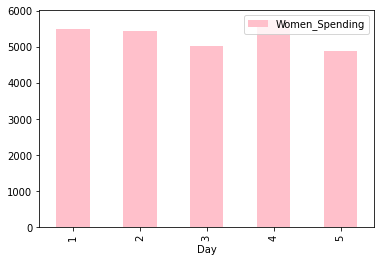

In [16]:
w = ([Order[i][Order[i]['Gender']==1]['Expenses'].sum() for i in range(d)])
df = pd.DataFrame(w, columns = ['Women_Spending'])
df.index.name = 'Day'
df.index = df.index + 1
#Plot bar of Women_Spending in df
df.plot.bar(color="Pink")
#Sum 1 to df.index


Women spent a total of:

In [17]:
df.sum()[0]

26570.178541794583

###### <span style='color:teal'> *Men* <span><br>

<AxesSubplot:xlabel='Day'>

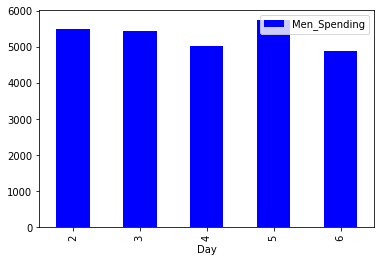

In [18]:
m = ([Order[i][Order[i]['Gender']==0]['Expenses'].sum() for i in range(d)])
df2 = pd.DataFrame(w, columns = ['Men_Spending'])
df2.index.name = 'Day'
df2.index = df.index + 1
#Plot bar of Women_Spending in df
df2.plot.bar(color="Blue")
#Sum 1 to df.index


Men spent a total of:

In [19]:
df2.sum()[0]

26570.178541794583

##### 2. What was the average consumption of women and men?

In [20]:
avg_women = np.mean([Order[i][Order[i]['Gender']==1]['Expenses'].mean() for i in range(d)])
avg_men = np.mean([Order[i][Order[i]['Gender']==0]['Expenses'].mean() for i in range(d)])
print('The average consumption of women was:',avg_women.round(2),'.','Men avg. was:', avg_men.round(2), '\n',)

The average consumption of women was: 63.83 . Men avg. was: 49.04 



##### 3. What was the number of people served per day?

In [21]:
Avg_people = ([Order[i].index for i in range(d)])
[print('Day',i+1,':',len(Avg_people[i])) for i in range(d)][0]

Day 1 : 177
Day 2 : 169
Day 3 : 166
Day 4 : 183
Day 5 : 172


##### 4. What was the average service time?

Women service time was much more compared with men.<br>
It's important to note, that this is only true due to the data given for the model.

In [22]:
Women_time = np.mean([Order[i][Order[i]['Gender']==1]['Total_Time'].mean() for i in range(d)])
Men_time = np.mean([Order[i][Order[i]['Gender']==0]['Total_Time'].mean() for i in range(d)])
print('The average service time for women was:',Women_time.round(2),'s. ','Men avg was:', Men_time.round(2), 's.',)

The average service time for women was: 196.15 s.  Men avg was: 98.22 s.


As we know, MonteCarlo results are an approximate but they are more accurate if we do more *N* simulations. 

##### 5. How much was the average profit of the cafeteria in 5 days of work and its respective profitability?

Nevertheless, N=10000 is considered a close enough range for MonteCarlo simulations. <br>
This is because the mean is equal to: $$\mu=\frac{1}{N}\sum_{i=1}^{N}X_i$$
And the standard deviation is equal to the root of the variance: $$\sigma=\sqrt{\frac{1}{N}\sum_{i=1}^{N}(X_i-\mu)^2}$$
For example, 1m simulations is an exxageration for results varying more than 2 or 3 decimal places.

In [23]:
dia_women = ([Order[i][Order[i]['Gender']==1]['Expenses'].sum() for i in range(d)])
dia_men = ([Order[i][Order[i]['Gender']==0]['Expenses'].sum() for i in range(d)])
#dia_women,dia_men
print('The profit of the cafeteria was:',np.sum(dia_women)*0.6 + np.sum(dia_men)*0.6)

The profit of the cafeteria was: 29227.41256181495
